## 使用多层感知机MLP 做数据二分类和激活函数的对比
[PyTorch快速使用介绍–实现分类](https://mathpretty.com/9469.html)

In [1]:
from sklearn import datasets
import torch

In [2]:
# 生成样例数据, 800个作为训练数据,200个作为测试数据
noisy_moons, labels = datasets.make_moons(n_samples=1000, noise=.05, random_state=10)
X_train,Y_train,X_test,Y_test = noisy_moons[:-200],labels[:-200],noisy_moons[-200:],labels[-200:]
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

800 800 200 200


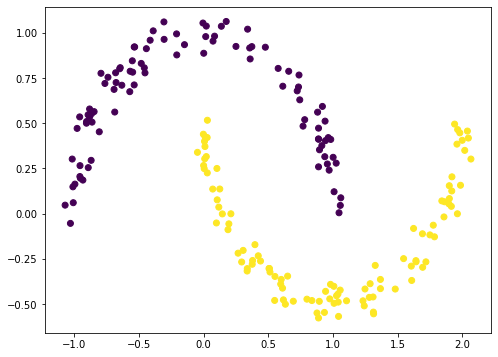

In [3]:
# 显示数据
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

In [4]:
# 构建模型分类器
import torch.nn as nn
class MLPClassifer(nn.Module):
    def __init__(self):
        super(MLPClassifer, self).__init__()
        self.class_col = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,2),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.class_col(x)
        return out

In [5]:
model = MLPClassifer() # 实例化模型
loss_fn = nn.CrossEntropyLoss() # 定义损失函数
optimiser = torch.optim.SGD(params=model.parameters(), lr=0.05) # 定义优化器

In [6]:
from torch import Tensor
from torch.autograd import Variable
import torch.utils.data as Data
X_train = Tensor(X_train) # 输入 x 张量
X_test = Tensor(X_test)
Y_train = Tensor(Y_train).long() # 输入 y 张量
Y_test = Tensor(Y_test).long()
# 使用batch训练
torch_dataset = Data.TensorDataset(X_train, Y_train) # 合并训练数据和目标数据
BATCH_SIZE = 25
loader = Data.DataLoader( dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2 )

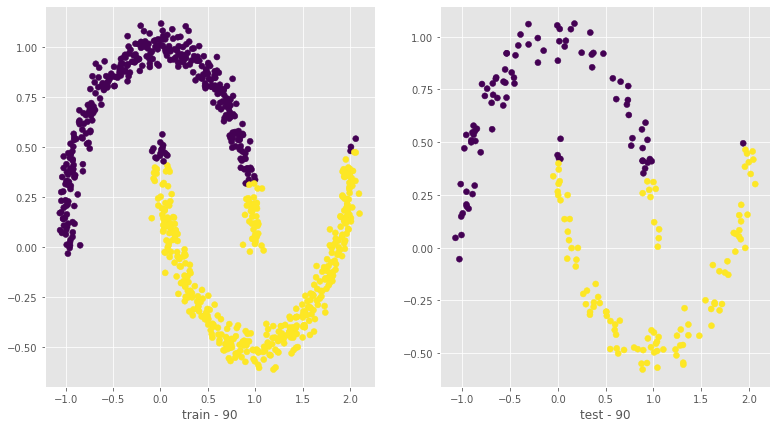

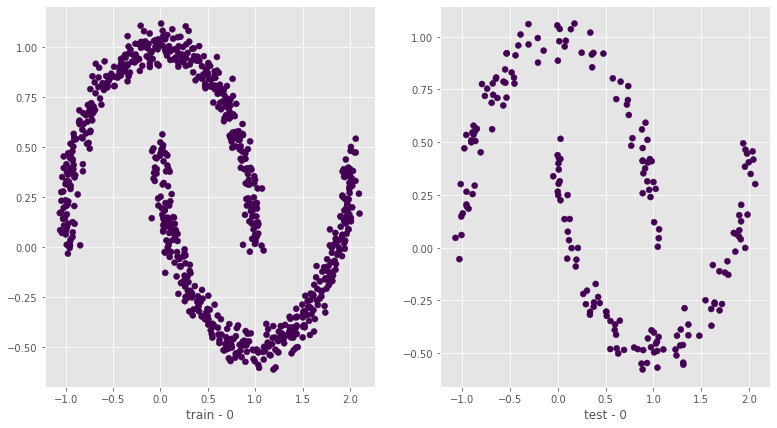

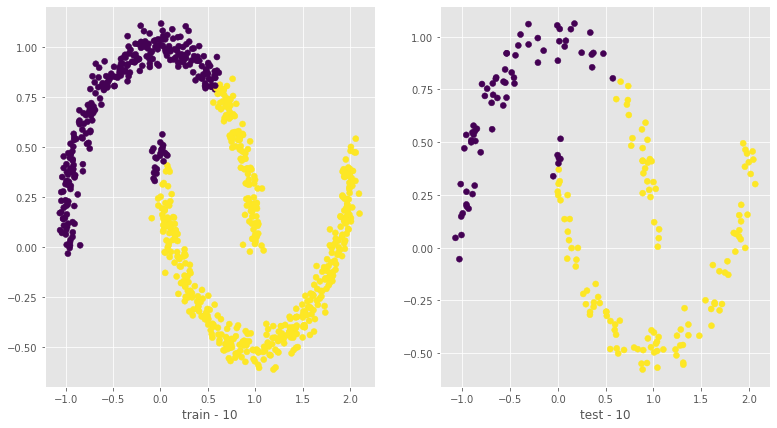

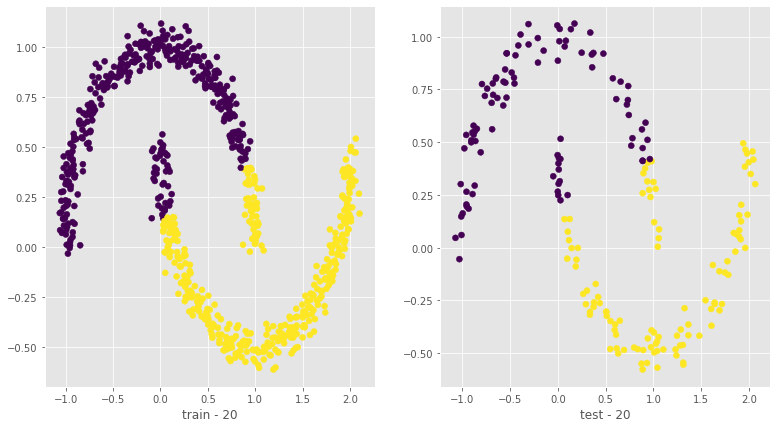

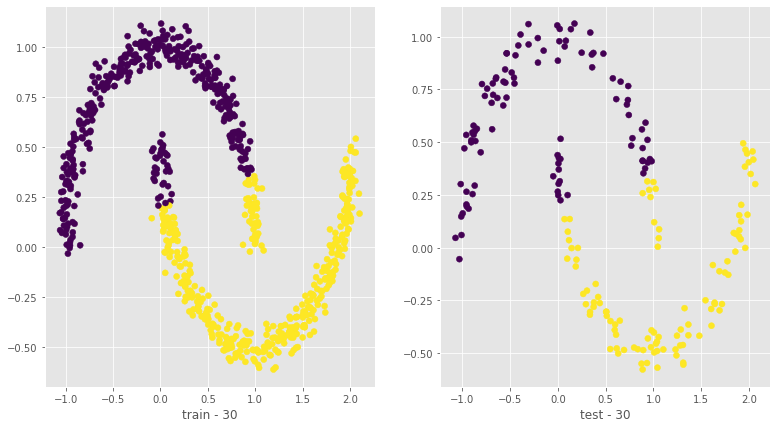

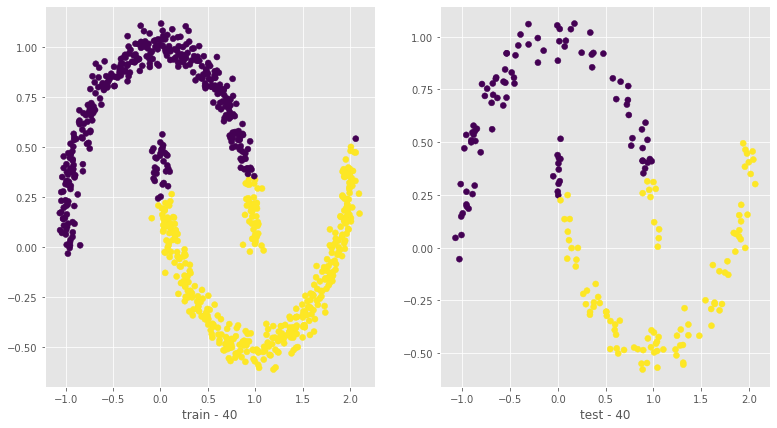

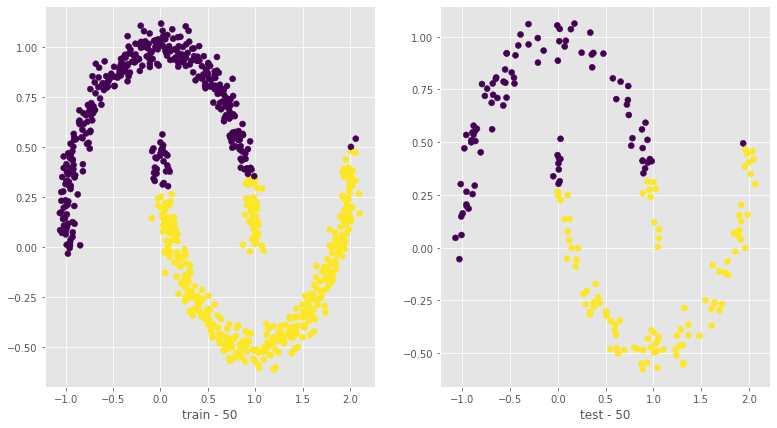

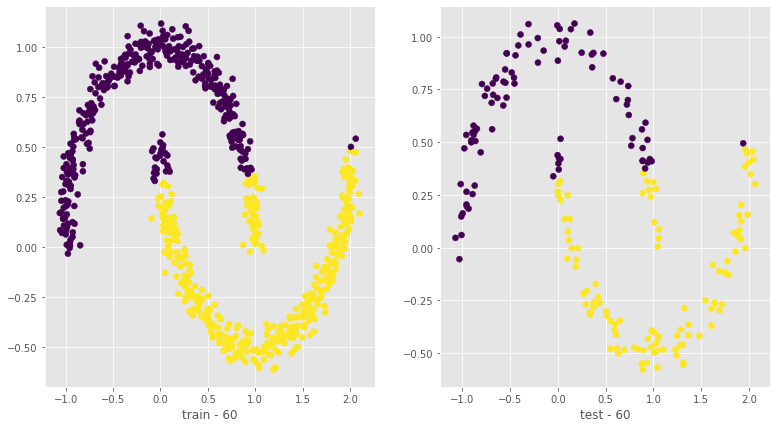

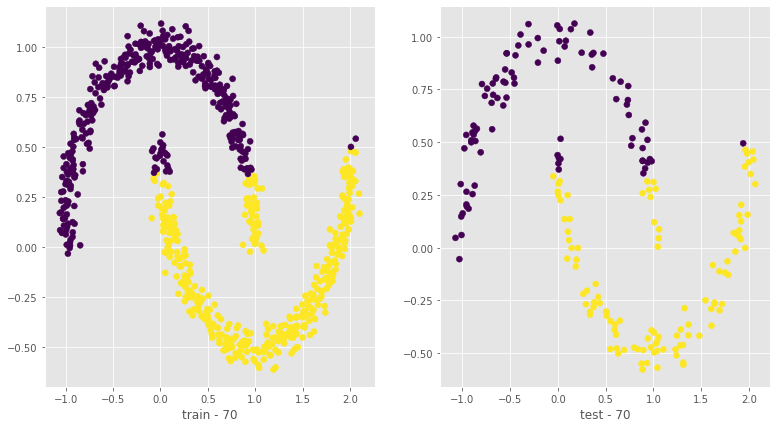

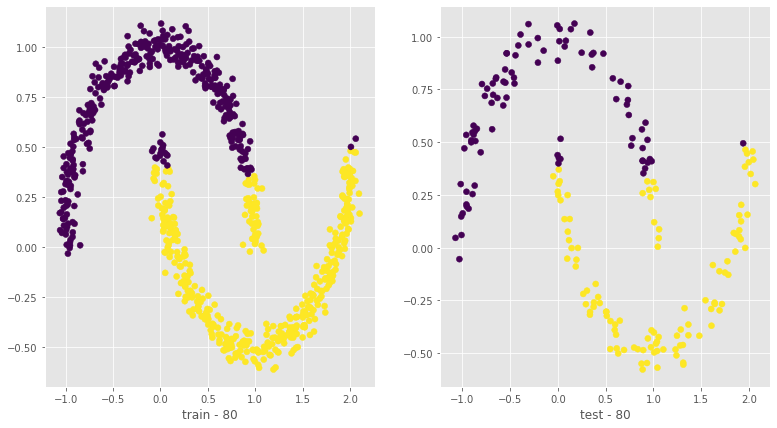

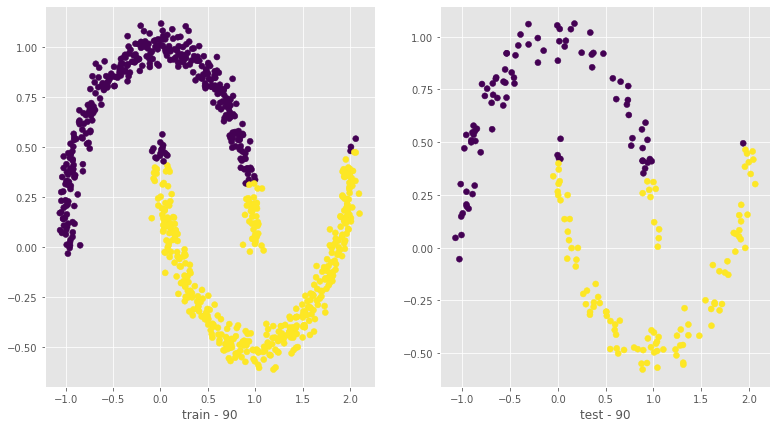

In [7]:
from IPython import display

# ---------
# 进行训练
# ---------
loss_list = []
plt.style.use('ggplot')
for epoch in range(100):
    for step, (batch_x, batch_y) in enumerate(loader):
        optimiser.zero_grad() # 梯度清零
        out = model(batch_x) # 前向传播
        # out.squeeze_(1)
        # print(out[:20])
        # print(batch_y[:20])
        loss = loss_fn(out, batch_y) # 计算损失
        loss.backward() # 反向传播
        optimiser.step() # 随机梯度下降
    loss_list.append(loss)
    if epoch % 10 == 0:
        outputs_train = model(X_train)
        _, predicted_train = torch.max(outputs_train, 1)
        outputs_test = model(X_test)
        _, predicted_test = torch.max(outputs_test, 1)
        # 同时画出训练集和测试的效果
        display.clear_output(wait=True)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,7))
        axes[0].scatter(X_train[:,0].numpy(),X_train[:,1].numpy(),c=predicted_train)
        axes[0].set_xlabel(f'train - {epoch}')
        axes[1].scatter(X_test[:,0].numpy(),X_test[:,1].numpy(),c=predicted_test)
        axes[1].set_xlabel(f'test - {epoch}')
        display.display(fig)

In [8]:
outputs_train = model(X_train)
print(outputs_train[:10])
_, predicted_train = torch.max(outputs_train, 1)
print(predicted_train[:10])

tensor([[7.1061e-04, 9.9936e-01],
        [1.0804e-01, 8.9708e-01],
        [1.5656e-01, 8.5040e-01],
        [9.9305e-01, 6.8208e-03],
        [1.2065e-04, 9.9989e-01],
        [5.1317e-02, 9.5130e-01],
        [9.8404e-01, 1.6102e-02],
        [9.9349e-01, 6.2536e-03],
        [2.7038e-01, 7.4754e-01],
        [9.7963e-01, 2.0670e-02]], grad_fn=<SliceBackward>)
tensor([1, 1, 1, 0, 1, 1, 0, 0, 1, 0])
